In [10]:
# Install necessary packages
%pip install pandas matplotlib seaborn

# Import necessary libraries
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt
import seaborn as sns

# Load the downloaded dataset into a pandas DataFrame
# Update the file path to the correct location of the dataset
data = pd.read_csv("../base/produitsV2.csv")  # Corrected file path
path = "../base/produitsV2.csv"  # Assign the path to the variable 'path'
print("Path to dataset files:", path)

Note: you may need to restart the kernel to use updated packages.
Path to dataset files: ../base/produitsV2.csv


In [11]:
data.head()

,id_produit;catégorie;marque;prix;stock_minimum
0,P00001;Soins capillaires;Luxe eclat;467.42;52
1,P00002;Accessoires;Maison Pure;291.26;10
2,P00003;Maquillage;Essentielle Paris;354.39;60
3,P00004;Accessoires;Reflet d'or;462.8;33
4,P00005;Accessoires;Elixir Haute Beauté;359.47;33


In [12]:
data

,id_produit;catégorie;marque;prix;stock_minimum
0,P00001;Soins capillaires;Luxe eclat;467.42;52
1,P00002;Accessoires;Maison Pure;291.26;10
2,P00003;Maquillage;Essentielle Paris;354.39;60
3,P00004;Accessoires;Reflet d'or;462.8;33
4,P00005;Accessoires;Elixir Haute Beauté;359.47;33
...,...
995,P00996;Parfums;Aura Cristal;373.97;56
996,P00997;Soins de la peau;Infusion Précieuse;265...
997,P00998;Soins de la peau;Velours Naturel;346.51;40
998,P00999;Soins capillaires;Ãveil Ãlégant;40.0;89


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   id_produit;catégorie;marque;prix;stock_minimum  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [14]:
data.describe()

,id_produit;catégorie;marque;prix;stock_minimum
count,1000
unique,1000
top,P00001;Soins capillaires;Luxe eclat;467.42;52
freq,1


In [15]:
# Vérification des types des colonnes
print("\Types des colonnes :")
print(data.dtypes)
print("Vérification des formats terminée.")

\Types des colonnes :
id_produit;catégorie;marque;prix;stock_minimum    object
dtype: object
Vérification des formats terminée.


<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_28089/2916010492.py:2: SyntaxWarning: invalid escape sequence '\T'
  print("\Types des colonnes :")


In [16]:
data.describe()

,id_produit;catégorie;marque;prix;stock_minimum
count,1000
unique,1000
top,P00001;Soins capillaires;Luxe eclat;467.42;52
freq,1


In [17]:
import pandas as pd

# Assuming 'data' is your DataFrame
missing_values = data.isnull().sum()

# Print the number of missing values per column
print(missing_values)

# Print the total number of missing values in the DataFrame
total_missing = missing_values.sum()
print(f"\nTotal missing values: {total_missing}")

id_produit;catégorie;marque;prix;stock_minimum    0
dtype: int64

Total missing values: 0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   id_produit;catégorie;marque;prix;stock_minimum  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame and contains columns 'catégorie' and 'marque'

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit and transform the encoder on the 'catégorie' column
data['catégorie_encoded'] = encoder.fit_transform(data['catégorie'])

# Fit and transform the encoder on the 'marque' column
data['marque_encoded'] = encoder.fit_transform(data['marque'])

# Now 'data' contains the original columns plus the encoded columns
print(data.head())

KeyError: 'catégorie'

In [22]:
!pip install scikit-learn


In [ ]:
# 1. Nettoyage des colonnes numériques
# Ensure 'prix' and 'stock_minimum' are numeric
data['prix'] = pd.to_numeric(data['prix'], errors='coerce')
data['stock_minimum'] = pd.to_numeric(data['stock_minimum'], errors='coerce')

# 2. Encodage des colonnes catégorielles
from sklearn.preprocessing import LabelEncoder

le_produit = LabelEncoder()
le_catégorie = LabelEncoder()
le_marque = LabelEncoder()

data['id_produit'] = le_produit.fit_transform(data['id_produit'])
data['catégorie'] = le_catégorie.fit_transform(data['catégorie'])
data['marque'] = le_marque.fit_transform(data['marque'])

# Vérifier le résultat
print(data.dtypes)
print(data.head())


id_produit         int64
catégorie          int64
marque             int64
prix             float64
stock_minimum      int64
dtype: object
   id_produit  catégorie  marque    prix  stock_minimum
0           0          3      15  467.42             52
1           1          0      17  291.26             10
2           2          1       7  354.39             60
3           3          0      21  462.80             33
4           4          0       8  359.47             33


In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame and contains columns 'catégorie' and 'marque'

# Perform one-hot encoding on 'catégorie' and 'marque' columns
encoded_data = pd.get_dummies(data, columns=['catégorie', 'marque'], prefix=['catégorie', 'marque'])

# Now 'encoded_data' contains the original columns plus the encoded columns
print(encoded_data.head())

  id_produit    prix stock_minimum  catégorie_Accessoires  \
0     P00001  467.42            52                  False   
1     P00002  291.26            10                   True   
2     P00003  354.39            60                  False   
3     P00004   462.8            33                   True   
4     P00005  359.47            33                   True   

   catégorie_Maquillage  catégorie_Parfums  catégorie_Soins capillaires  \
0                 False              False                         True   
1                 False              False                        False   
2                  True              False                        False   
3                 False              False                        False   
4                 False              False                        False   

   catégorie_Soins de la peau  marque_Aroma Sublime  marque_Atelier Minéral  \
0                       False                 False                   False   
1                       

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   id_produit;catégorie;marque;prix;stock_minimum  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [ ]:
data.head()

,id_produit,catégorie,marque,prix,stock_minimum
0,P00001,Soins capillaires,Luxe eclat,467.42,52
1,P00002,Accessoires,Maison Pure,291.26,10
2,P00003,Maquillage,Essentielle Paris,354.39,60
3,P00004,Accessoires,Reflet d'or,462.80,33
4,P00005,Accessoires,Elixir Haute Beauté,359.47,33


In [ ]:
data.describe()


,id_produit,catégorie,marque,prix,stock_minimum
count,1000,1000,1000,1000,1000
unique,1000,5,30,984,90
top,P00001,Soins de la peau,Luxe eclat,288.63,30
freq,1,210,100,2,21


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_produit     1000 non-null   object 
 1   catégorie      1000 non-null   object 
 2   marque         1000 non-null   object 
 3   prix           1000 non-null   float64
 4   stock_minimum  1000 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


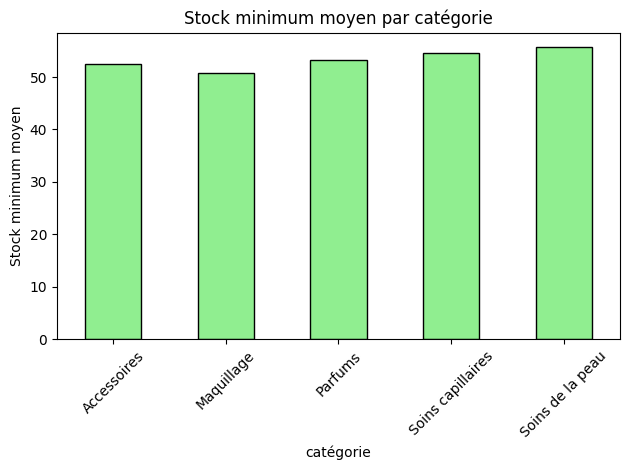

In [ ]:
# Calcul du stock minimum moyen par catégorie
stock_moyen = data.groupby('catégorie')['stock_minimum'].mean()

# Affichage du graphique du stock minimum moyen par catégorie
stock_moyen.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.ylabel("Stock minimum moyen")
plt.title("Stock minimum moyen par catégorie")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

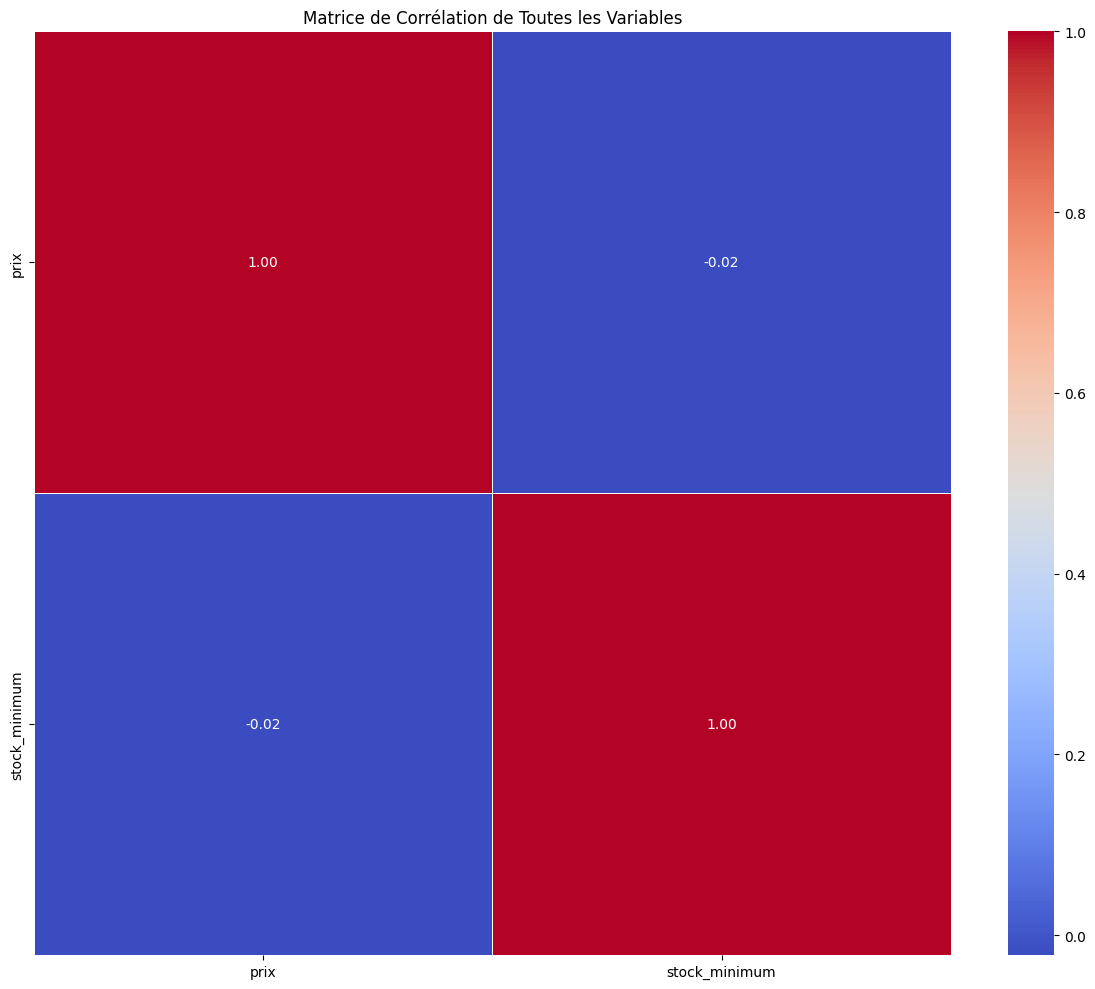

In [ ]:
# Sélectionner toutes les colonnes
all_data = data.select_dtypes(include=['object', 'float64', 'int64'])

# Calculer la matrice de corrélation
correlation_matrix_all = all_data.corr(numeric_only=True)

# Afficher la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation de Toutes les Variables')
plt.tight_layout()
plt.show()

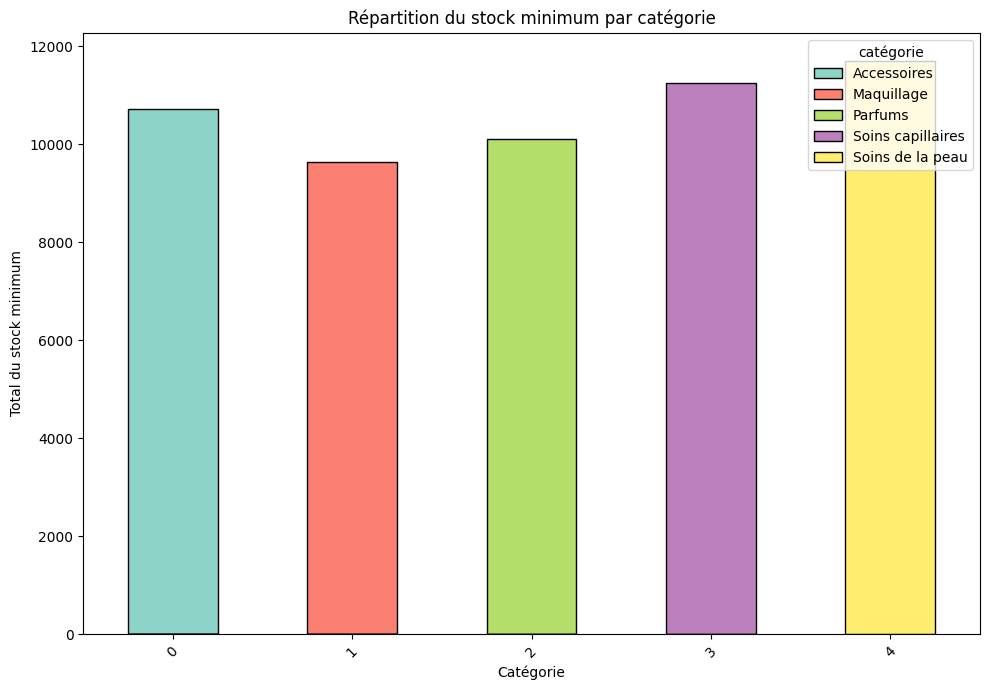

In [ ]:
# Graphique à barres empilées pour la répartition du stock minimum par catégorie et sous-catégorie

from sklearn.preprocessing import LabelEncoder

# Vérifiez si 'catégorie_encoded' n'existe pas déjà
if 'catégorie_encoded' not in data.columns:
	# Encode the 'catégorie' column to create 'catégorie_encoded'
	le_catégorie = LabelEncoder()
	data['catégorie_encoded'] = le_catégorie.fit_transform(data['catégorie'])

# Création du graphique empilé
stock_par_categorie = data.groupby(['catégorie_encoded', 'catégorie'])['stock_minimum'].sum().unstack()

# Affichage du graphique à barres empilées
stock_par_categorie.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='Set3', edgecolor='black')

plt.title("Répartition du stock minimum par catégorie")
plt.ylabel("Total du stock minimum")
plt.xlabel("Catégorie")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Ce graphique montre la distribution moyen du stock par catégorie 


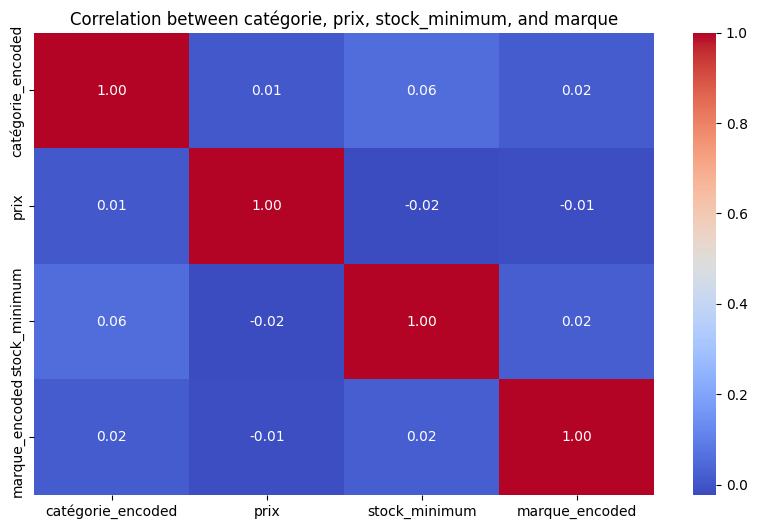

In [ ]:
# Assuming data is already loaded and cleaned

# Encode categorical variables
data['catégorie_encoded'] = data['catégorie'].astype('category').cat.codes
data['marque_encoded'] = data['marque'].astype('category').cat.codes

# Calculate correlation matrix
correlation_matrix = data[['catégorie_encoded', 'prix', 'stock_minimum', 'marque_encoded']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between catégorie, prix, stock_minimum, and marque')
plt.show()

In [ ]:
Il n'y a pas de corrélations significatives entre les variables catégorielles et numériques.

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_22359/1216391913.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='catégorie', y='stock_minimum', palette='Set2')
/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_22359/1216391913.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='catégorie', y='prix', palette='Set2')
/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_22359/1216391913.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='marque', y='stock_minimum', palet

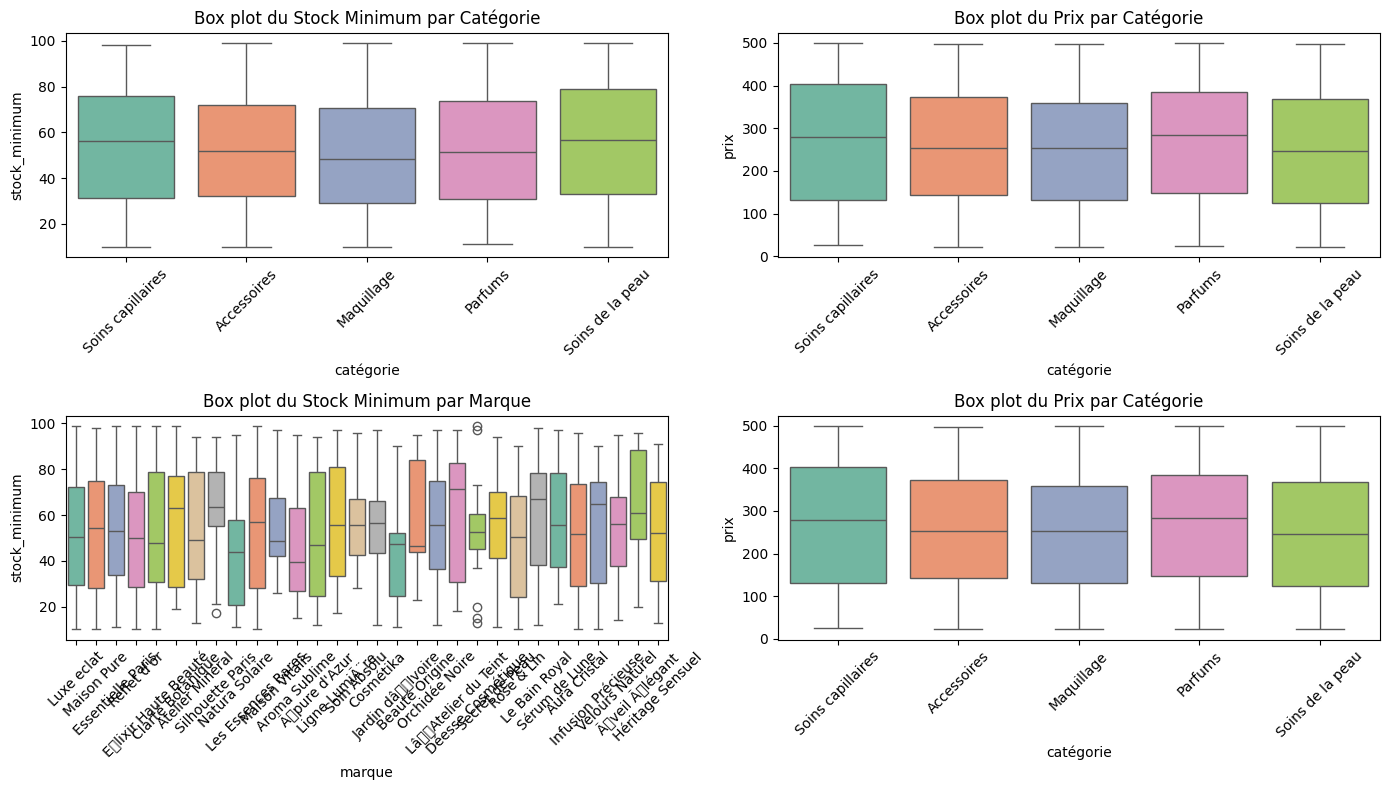

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que les données sont déjà nettoyées et prêtes à l'emploi

# Configuration de la taille de la figure pour plus de clarté
plt.figure(figsize=(14, 8))

# Box plot pour le stock minimum
plt.subplot(2, 2, 1)
sns.boxplot(data=data, x='catégorie', y='stock_minimum', palette='Set2')
plt.title('Box plot du Stock Minimum par Catégorie')
plt.xticks(rotation=45)

# Box plot pour le prix
plt.subplot(2, 2, 2)
sns.boxplot(data=data, x='catégorie', y='prix', palette='Set2')
plt.title('Box plot du Prix par Catégorie')
plt.xticks(rotation=45)

# Box plot pour la marque
plt.subplot(2, 2, 3)
sns.boxplot(data=data, x='marque', y='stock_minimum', palette='Set2')
plt.title('Box plot du Stock Minimum par Marque')
plt.xticks(rotation=45)

# Box plot pour la catégorie
plt.subplot(2, 2, 4)
sns.boxplot(data=data, x='catégorie', y='prix', palette='Set2')
plt.title('Box plot du Prix par Catégorie')
plt.xticks(rotation=45)

# Ajustement de l'espace entre les graphiques pour éviter que les titres et labels ne se chevauchent
plt.tight_layout()

# Affichage du graphique
plt.show()


Il n'y a presque aucune valeur aberrante, donc aucune modification n'est nécessaire, et tous les résultats semblent être en accord avec la réalité.

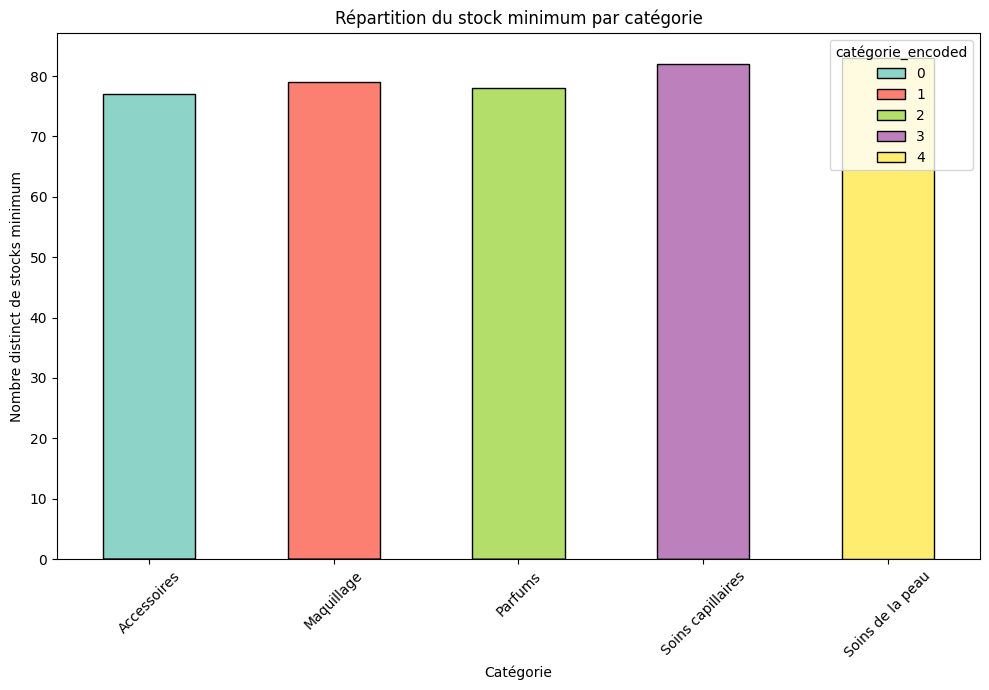

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Vérifiez si 'catégorie_encoded' n'existe pas déjà
if 'catégorie_encoded' not in data.columns:
    # Encode the 'catégorie' column to create 'catégorie_encoded'
    le_catégorie = LabelEncoder()
    data['catégorie_encoded'] = le_catégorie.fit_transform(data['catégorie'])

# Utiliser un distinct count sur le stock minimum
stock_par_categorie = data.groupby(['catégorie', 'catégorie_encoded'])['stock_minimum'].nunique().unstack()

# Création du graphique empilé
stock_par_categorie.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='Set3', edgecolor='black')

plt.title("Répartition du stock minimum par catégorie")
plt.ylabel("Nombre distinct de stocks minimum")
plt.xlabel("Catégorie")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


D'après ce graphique, la catégorie "soins de la peau" est celle qui possède le plus grand stock minimum, avec environ 80 produits. Cependant, toutes les catégories présentent un stock minimum relativement similaire.

In [ ]:
data.head()

,id_produit,catégorie,marque,prix,stock_minimum,catégorie_encoded,marque_encoded
0,P00001,Soins capillaires,Luxe eclat,467.42,52,3,15
1,P00002,Accessoires,Maison Pure,291.26,10,0,17
2,P00003,Maquillage,Essentielle Paris,354.39,60,1,7
3,P00004,Accessoires,Reflet d'or,462.80,33,0,21
4,P00005,Accessoires,Elixir Haute Beauté,359.47,33,0,8


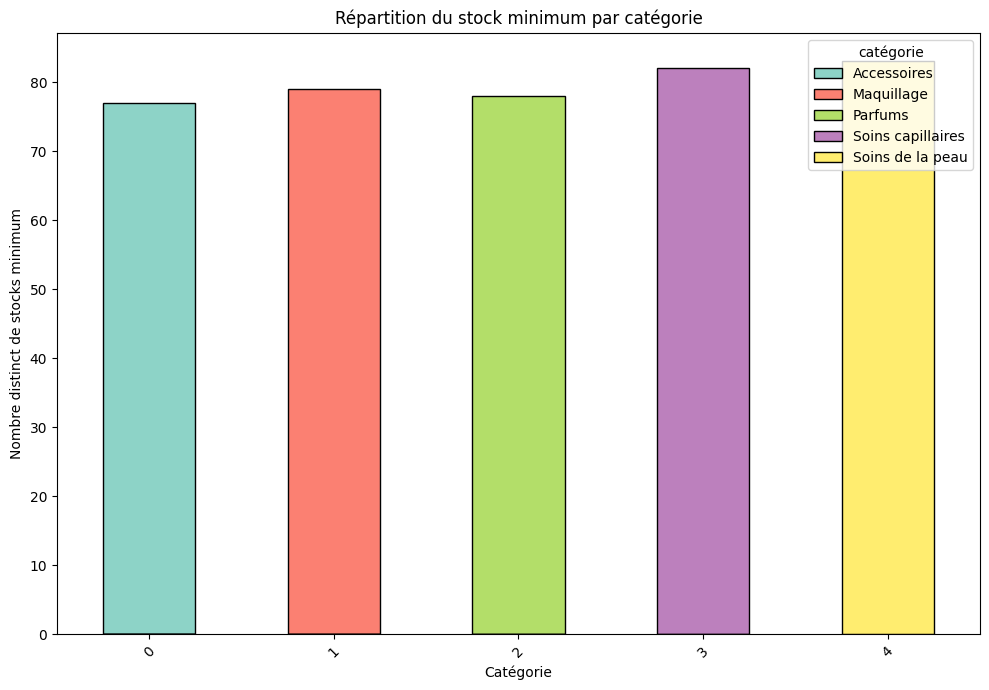

In [ ]:
# Vérifiez si 'catégorie_encoded' n'existe pas déjà
if 'catégorie_encoded' not in data.columns:
    # Encode la colonne 'catégorie' pour créer 'catégorie_encoded'
    le_catégorie = LabelEncoder()
    data['catégorie_encoded'] = le_catégorie.fit_transform(data['catégorie'])

# Utiliser un count distinct sur le stock minimum pour chaque catégorie
stock_par_categorie = data.groupby(['catégorie_encoded', 'catégorie'])['stock_minimum'].nunique().unstack(fill_value=0)

# Création du graphique empilé
stock_par_categorie.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='Set3', edgecolor='black')

plt.title("Répartition du stock minimum par catégorie")
plt.ylabel("Nombre distinct de stocks minimum")
plt.xlabel("Catégorie")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Split the single column into separate columns
df = data['id_produit;catégorie;marque;prix;stock_minimum'].str.split(';', expand=True)
df.columns = ['id_produit', 'catégorie', 'marque', 'prix', 'stock_minimum']

# Convert 'prix' and 'stock_minimum' to numeric
df['prix'] = pd.to_numeric(df['prix'], errors='coerce')
df['stock_minimum'] = pd.to_numeric(df['stock_minimum'], errors='coerce')

# Colonnes à normaliser
colonnes_a_normaliser = ['prix', 'stock_minimum']

# Création du scaler
scaler = MinMaxScaler()

# Normalisation
df_normalise = df.copy()
df_normalise[colonnes_a_normaliser] = scaler.fit_transform(df[colonnes_a_normaliser])

print("Données normalisées :")
print(df_normalise)

Données normalisées :
    id_produit          catégorie                marque      prix  \
0       P00001  Soins capillaires            Luxe eclat  0.932356   
1       P00002        Accessoires           Maison Pure  0.563435   
2       P00003         Maquillage     Essentielle Paris  0.695644   
3       P00004        Accessoires           Reflet d'or  0.922681   
4       P00005        Accessoires  Elixir Haute Beauté  0.706283   
..         ...                ...                   ...       ...   
995     P00996            Parfums          Aura Cristal  0.736649   
996     P00997   Soins de la peau    Infusion Précieuse  0.510262   
997     P00998   Soins de la peau       Velours Naturel  0.679141   
998     P00999  Soins capillaires       Ãveil Ãlégant  0.037236   
999     P01000         Maquillage      Héritage Sensuel  0.080586   

     stock_minimum  
0         0.471910  
1         0.000000  
2         0.561798  
3         0.258427  
4         0.258427  
..             ...  
99

In [32]:
# Supposons que 'data' est votre DataFrame
# Exemple de création d'un DataFrame
data = pd.DataFrame({
    'catégorie': ['A', 'B', 'A', 'C'],
    'marque': ['X', 'Y', 'X', 'Z'],
    'prix': [10, 20, 15, 30]
})

# Afficher le DataFrame original
print("DataFrame original:")
print(data)

# Effectuer l'encodage one-hot sur les colonnes 'catégorie' et 'marque'
encoded_data = pd.get_dummies(data, columns=['catégorie', 'marque'], prefix=['catégorie', 'marque'])

# Afficher le DataFrame après encodage
print("\nDataFrame après encodage one-hot:")
print(encoded_data)

DataFrame original:
  catégorie marque  prix
0         A      X    10
1         B      Y    20
2         A      X    15
3         C      Z    30

DataFrame après encodage one-hot:
   prix  catégorie_A  catégorie_B  catégorie_C  marque_X  marque_Y  marque_Z
0    10         True        False        False      True     False     False
1    20        False         True        False     False      True     False
2    15         True        False        False      True     False     False
3    30        False        False         True     False     False      True


In [34]:
from IPython.display import FileLink
# Sauvegarder le DataFrame modifié dans un nouveau fichier CSV
df.to_csv('nouveau_fichier_modifie.csv', index=False)

In [35]:


# Crée un lien pour télécharger le fichier
FileLink('nouveau_fichier_modifie.csv')

/Users/martinvalentine/Documents/GitHub/Projet_Supply_chain/Valentine/nouveau_fichier_modifie.csv